In [3]:
import findspark
findspark.init()
from pyspark import SparkContext
sc = SparkContext()

In [6]:
data_user = sc.textFile('D:\myProject\Spark\PySpark\ml-100k\\u.user')
data_user.first()

'1|24|M|technician|85711'

In [7]:
user_fields = data_user.map(lambda line: line.split('|'))
user_fields.take(5)

[['1', '24', 'M', 'technician', '85711'],
 ['2', '53', 'F', 'other', '94043'],
 ['3', '23', 'M', 'writer', '32067'],
 ['4', '24', 'M', 'technician', '43537'],
 ['5', '33', 'F', 'other', '15213']]

In [8]:
count_by_occupation = user_fields.map(lambda fields: (fields[3], 1)).reduceByKey(lambda x, y: x + y).collect()

In [10]:
import numpy as np
#获取用户职位，并作为柱状图的x轴数据显示
x_axis1 = np.array([a[0] for a in count_by_occupation])
x_axis1

array(['other', 'executive', 'administrator', 'student', 'educator',
       'programmer', 'homemaker', 'artist', 'engineer', 'none', 'retired',
       'doctor', 'technician', 'writer', 'lawyer', 'scientist',
       'entertainment', 'librarian', 'marketing', 'healthcare',
       'salesman'], dtype='<U13')

In [11]:
#获取用户的各个职位数，并作为y轴数据显示
y_axis1 = np.array([a[1] for a in count_by_occupation])
y_axis1

array([105,  32,  79, 196,  95,  66,   7,  28,  67,   9,  14,   7,  27,
        45,  12,  31,  18,  51,  26,  16,  12])

In [13]:
#让x轴类别的显示按照y轴中每种职位的个数升序排序
x_axis = x_axis1[np.argsort(y_axis1)]
x_axis

array(['doctor', 'homemaker', 'none', 'salesman', 'lawyer', 'retired',
       'healthcare', 'entertainment', 'marketing', 'technician', 'artist',
       'scientist', 'executive', 'writer', 'librarian', 'programmer',
       'engineer', 'administrator', 'educator', 'other', 'student'],
      dtype='<U13')

In [14]:
#y轴也是升序
y_axis = y_axis1[np.argsort(y_axis1)]
y_axis

array([  7,   7,   9,  12,  12,  14,  16,  18,  26,  27,  28,  31,  32,
        45,  51,  66,  67,  79,  95, 105, 196])

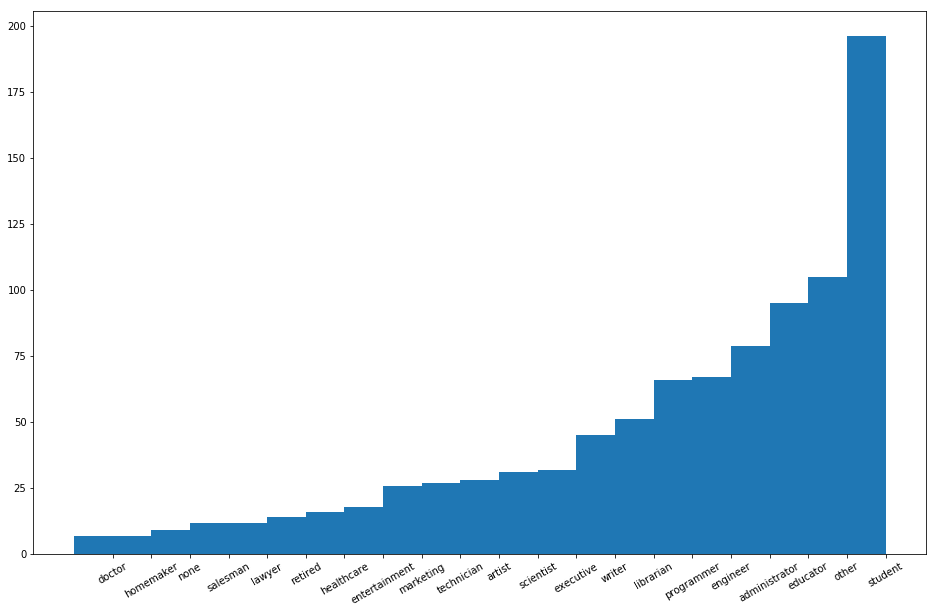

In [17]:
from matplotlib import pyplot as plt
#设置柱状图中x轴范围以及width
pos = np.arange(len(x_axis))
width = 1.0

#将统计的职位信息使用mapplotlib生成柱状图
ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(x_axis)
plt.bar(pos,y_axis,width)
plt.xticks(rotation=30)
fig = plt.gcf()
fig.set_size_inches(16,10)
plt.show()